# Lab 8: Define and Solve an ML Problem of Your Choosing

In [97]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [144]:
#data
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
df = pd.read_csv(adultDataSet_filename, header=0)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Non-Female,2174,0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,13.0,United-States,<=50K
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Non-Female,0,0,40.0,United-States,<=50K
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Non-Female,0,0,40.0,United-States,<=50K
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

The goal is to predict whether a person's income is greater than or less than $50K using the Adult Census dataset. This is a supervised learning problem because the model is trained on labeled data. Since there are only two possible outcomes for income, it qualifies as a binary classification task.

Initially, all features in the dataset will be considered, such as age, education, occupation, and hours worked per week. After cleaning the data, feature selection techniques like correlation analysis will be applied to identify the most relevant predictors for the income label.

This problem holds practical value for companies, especially in the banking industry. By predicting income levels, banks can assess creditworthiness, tailor financial products, and evaluate financial stability. A reliable model can help improve decision-making, reduce risk, and offer personalized services to customers.

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [136]:
df['income_binary']

0        <=50K
1        <=50K
2        <=50K
3        <=50K
4        <=50K
         ...  
32556    <=50K
32557     >50K
32558    <=50K
32559    <=50K
32560     >50K
Name: income_binary, Length: 32561, dtype: object

In [137]:
nan_count = df.isnull().sum()
nan_count

age                162
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex_selfID           0
capital-gain         0
capital-loss         0
hours-per-week     325
native-country     583
income_binary        0
dtype: int64

In [138]:
df.dropna(inplace=True)

In [139]:
nan_count = df.isnull().sum()
nan_count #confirming that the missing values were dropped

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex_selfID        0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income_binary     0
dtype: int64

In [140]:
df.dtypes

age               float64
workclass          object
fnlwgt              int64
education          object
education-num       int64
marital-status     object
occupation         object
relationship       object
race               object
sex_selfID         object
capital-gain        int64
capital-loss        int64
hours-per-week    float64
native-country     object
income_binary      object
dtype: object

In [141]:
#ONE HOT ENCODING 
to_encode = list(df.select_dtypes(include=['object']).columns)
to_encode

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex_selfID',
 'native-country',
 'income_binary']

In [142]:
df[to_encode].nunique() #listing numbers of unique categories in columns (don't want too high of values)

workclass          7
education         16
marital-status     7
occupation        14
relationship       6
race               5
sex_selfID         2
native-country    41
income_binary      2
dtype: int64

In [143]:
#Native Country 
top_15_NC = list(df['native-country'].value_counts().head(15).index)

for value in top_15_NC:
    
    ## Create columns and their values
    df['native-country_'+ value] = np.where(df['native-country']==value,1,0)
    
    
# Remove the original column from your DataFrame df
df.drop(columns = 'native-country', inplace=True)

print(df.columns)

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex_selfID',
       'capital-gain', 'capital-loss', 'hours-per-week', 'income_binary',
       'native-country_United-States', 'native-country_Mexico',
       'native-country_Philippines', 'native-country_Germany',
       'native-country_Puerto-Rico', 'native-country_Canada',
       'native-country_El-Salvador', 'native-country_India',
       'native-country_Cuba', 'native-country_England',
       'native-country_Jamaica', 'native-country_South',
       'native-country_China', 'native-country_Italy',
       'native-country_Dominican-Republic'],
      dtype='object')


In [107]:
#workclass
df['workclass']

0               State-gov
1        Self-emp-not-inc
2                 Private
3                 Private
4                 Private
               ...       
32556             Private
32557             Private
32558             Private
32559             Private
32560        Self-emp-inc
Name: workclass, Length: 29716, dtype: object

In [108]:
df_workclass = pd.get_dummies(df['workclass'], prefix='workclass_')

df = df.join(df_workclass)

# Remove the original 'CreditRating' column from DataFrame df
df.drop(columns = 'workclass', inplace=True)

In [109]:
df.columns #checking if worked properly

Index(['age', 'fnlwgt', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex_selfID', 'capital-gain',
       'capital-loss', 'hours-per-week', 'income_binary',
       'native-country_United-States', 'native-country_Mexico',
       'native-country_Philippines', 'native-country_Germany',
       'native-country_Puerto-Rico', 'native-country_Canada',
       'native-country_El-Salvador', 'native-country_India',
       'native-country_Cuba', 'native-country_England',
       'native-country_Jamaica', 'native-country_South',
       'native-country_China', 'native-country_Italy',
       'native-country_Dominican-Republic', 'workclass__Federal-gov',
       'workclass__Local-gov', 'workclass__Private', 'workclass__Self-emp-inc',
       'workclass__Self-emp-not-inc', 'workclass__State-gov',
       'workclass__Without-pay'],
      dtype='object')

In [110]:
#education
df_education = pd.get_dummies(df['education'], prefix='education_')

df = df.join(df_education)

# Remove the original 'CreditRating' column from DataFrame df
df.drop(columns = 'education', inplace=True)

df.columns #checking if worked properly

Index(['age', 'fnlwgt', 'education-num', 'marital-status', 'occupation',
       'relationship', 'race', 'sex_selfID', 'capital-gain', 'capital-loss',
       'hours-per-week', 'income_binary', 'native-country_United-States',
       'native-country_Mexico', 'native-country_Philippines',
       'native-country_Germany', 'native-country_Puerto-Rico',
       'native-country_Canada', 'native-country_El-Salvador',
       'native-country_India', 'native-country_Cuba', 'native-country_England',
       'native-country_Jamaica', 'native-country_South',
       'native-country_China', 'native-country_Italy',
       'native-country_Dominican-Republic', 'workclass__Federal-gov',
       'workclass__Local-gov', 'workclass__Private', 'workclass__Self-emp-inc',
       'workclass__Self-emp-not-inc', 'workclass__State-gov',
       'workclass__Without-pay', 'education__10th', 'education__11th',
       'education__12th', 'education__1st-4th', 'education__5th-6th',
       'education__7th-8th', 'education__9th

In [111]:
#marital-status     7
df_maritalStatus = pd.get_dummies(df['marital-status'], prefix='marital-status_')
df = df.join(df_maritalStatus)
df.drop(columns = 'marital-status', inplace=True)

#occupation        14
df_occupation = pd.get_dummies(df['occupation'], prefix='occupation_')
df = df.join(df_occupation)
df.drop(columns = 'occupation', inplace=True)

#relationship       6
df_relationship = pd.get_dummies(df['relationship'], prefix='relationship_')
df = df.join(df_relationship)
df.drop(columns = 'relationship', inplace=True)

#race               5
df_race = pd.get_dummies(df['race'], prefix='race_')
df = df.join(df_race)
df.drop(columns = 'race', inplace=True)

#sex_selfID         2
df_sex_selfID = pd.get_dummies(df['sex_selfID'], prefix='sex_selfID _')
df = df.join(df_sex_selfID )
df.drop(columns = 'sex_selfID', inplace=True)

df.columns

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'income_binary', 'native-country_United-States',
       'native-country_Mexico', 'native-country_Philippines',
       'native-country_Germany', 'native-country_Puerto-Rico',
       'native-country_Canada', 'native-country_El-Salvador',
       'native-country_India', 'native-country_Cuba', 'native-country_England',
       'native-country_Jamaica', 'native-country_South',
       'native-country_China', 'native-country_Italy',
       'native-country_Dominican-Republic', 'workclass__Federal-gov',
       'workclass__Local-gov', 'workclass__Private', 'workclass__Self-emp-inc',
       'workclass__Self-emp-not-inc', 'workclass__State-gov',
       'workclass__Without-pay', 'education__10th', 'education__11th',
       'education__12th', 'education__1st-4th', 'education__5th-6th',
       'education__7th-8th', 'education__9th', 'education__Assoc-acdm',
       'education__Assoc-voc', 'education__Bachel

In [112]:
df['income_binary'] = df['income_binary'].map({'<=50K': 0, '>50K': 1})
df['income_binary'] = df['income_binary'].astype(int) #corr only works with numerical numbesr 

df.corr()['income_binary'].sort_values(ascending=False)

income_binary                         1.000000
marital-status__Married-civ-spouse    0.445283
relationship__Husband                 0.400821
capital-gain                          0.344562
education-num                         0.335094
                                        ...   
occupation__Other-service            -0.165513
relationship__Not-in-family          -0.193098
sex_selfID __Female                  -0.216267
relationship__Own-child              -0.226255
marital-status__Never-married        -0.320415
Name: income_binary, Length: 79, dtype: float64

In [113]:
X = df[['age', 'education-num', 'capital-gain', 'hours-per-week']]
y = df['income_binary']

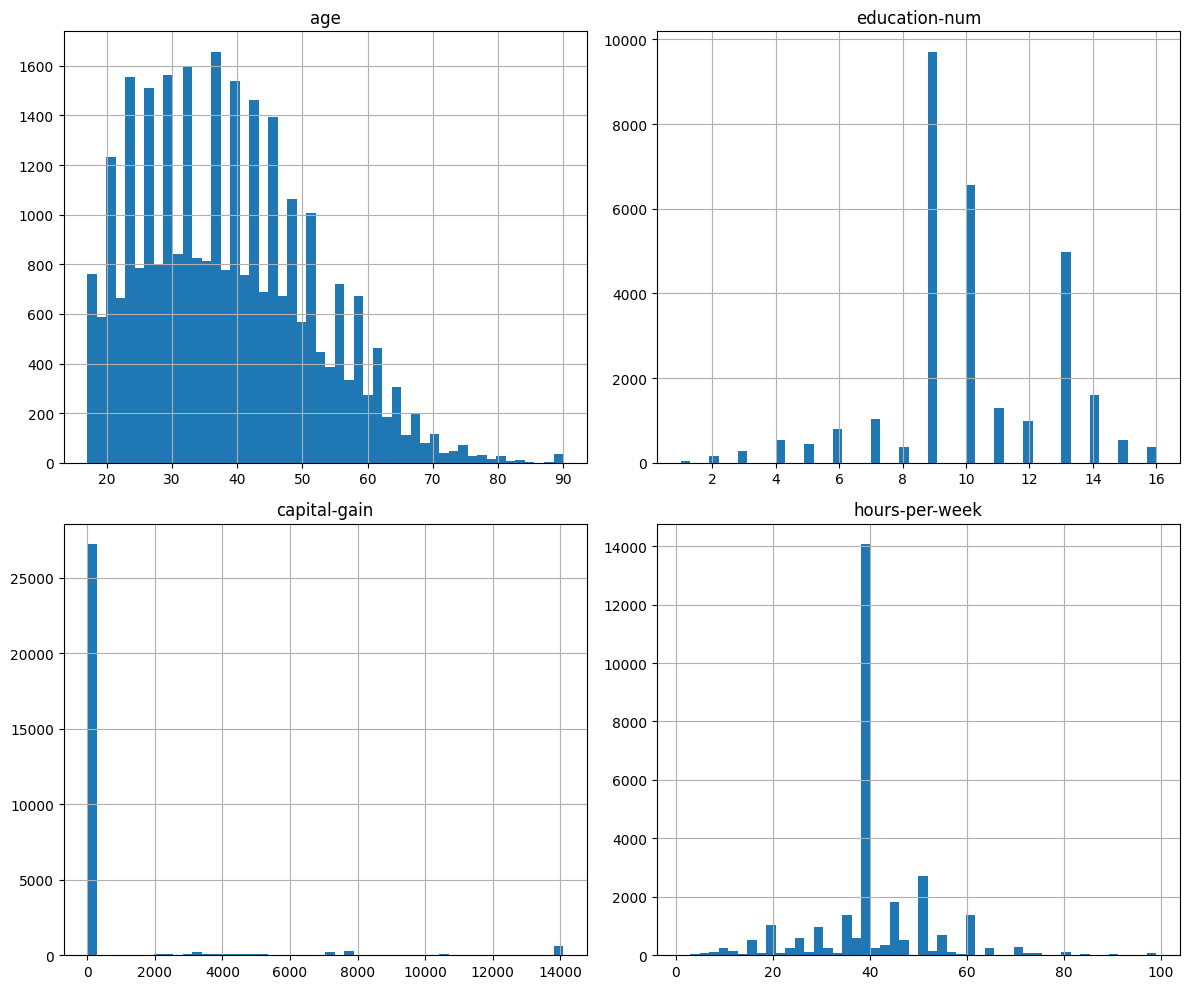

In [114]:
import matplotlib.pyplot as plt
#compare to identify any outliers
X.hist(bins=50, figsize=(12,10))
plt.tight_layout()
plt.show()

In [115]:
X.describe()

,age,education-num,capital-gain,hours-per-week
count,29716.000000,29716.000000,29716.000000,29716.000000
mean,38.442994,10.123671,628.524027,40.942018
std,13.137887,2.550625,2447.793868,11.995399
min,17.000000,1.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,45.000000
max,90.000000,16.000000,14084.000000,99.000000


In [116]:
#winsorization for outliers
from scipy.stats.mstats import winsorize

winsor_cols = ['age', 'education-num', 'capital-gain', 'hours-per-week']

for col in winsor_cols:
    df[col] = winsorize(df[col], limits=[0.01, 0.01])


In [117]:
df.head(15)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income_binary,native-country_United-States,native-country_Mexico,native-country_Philippines,...,relationship__Own-child,relationship__Unmarried,relationship__Wife,race__Amer-Indian-Inuit,race__Asian-Pac-Islander,race__Black,race__Other,race__White,sex_selfID __Female,sex_selfID __Non-Female
0,39.0,77516,13,2174,0,40.0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
1,50.0,83311,13,0,0,13.0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
2,38.0,215646,9,0,0,40.0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
3,53.0,234721,7,0,0,40.0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
4,28.0,338409,13,0,0,40.0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
5,37.0,284582,14,0,0,40.0,0,1,0,0,...,0,0,1,0,0,0,0,1,1,0
6,49.0,160187,5,0,0,16.0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
7,52.0,209642,9,0,0,45.0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,1
8,31.0,45781,14,14084,0,50.0,1,1,0,0,...,0,0,0,0,0,0,0,1,1,0
9,42.0,159449,13,5178,0,40.0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,1


In [118]:
#check for unique values to see if winsorization worked
for col in ['age', 'education-num', 'capital-gain', 'hours-per-week']:
    print(f"\n{col} unique values:")
    print(df[col].unique())



age unique values:
[39. 50. 38. 53. 28. 37. 49. 52. 31. 42. 30. 23. 32. 34. 25. 43. 40. 54.
 35. 56. 19. 20. 45. 22. 48. 21. 24. 57. 44. 41. 29. 47. 46. 36. 72. 27.
 18. 59. 33. 55. 61. 70. 64. 71. 66. 51. 58. 26. 17. 60. 65. 62. 63. 67.
 69. 68.]

education-num unique values:
[13  9  7 14  5 10 12  4 16 11 15  3  6  8]

capital-gain unique values:
[ 2174     0 14084  5178  5013  2407  7688  4064  4386  7298  1409  3674
  1055  2050  2176   594  6849  4101  8614  3411  2597  4650  2463  3103
 10605  2964  3325  2580  3471  4865  6514  1471  2329  2105  2885 10520
  2202  2961  6767  2228  1506 13550  2635  5556  4787  3781  3137  3818
   914   401  2829  2977  4934  2062  2354  3464  5455  1424  3273  4416
 10566  4931  7430  6497  3908   114  2346  2907  1151  9386  2414  2290
  3418  4508  2538  3456  1848  3887  7896  5721  9562  6418  1455  2036
  3942  1831 11678  2936  2993  7443  6360  4687  1797  6723  2009  3432
  6097  1639  2653   991  1173  2387  5060  1086]

hours-per-wee

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

After inspecting the dataset, I removed any entries with missing values and dropped features that showed low correlation with the income label. As a result, I now have a new feature list. The most impactful features identified for modeling are: age, hours-per-week, capital gain, and education-num.

To prepare the data for modeling, I applied one-hot encoding to convert categorical features into numerical format, which allowed me to evaluate correlation more effectively. Additionally, I used winsorization to address any potential outliers on the remaining four key features to reduce the influence of outliers and stabilize model training.

For modeling, I plan to use both Random Forest and Logistic Regression. The first model I will traub will be the Random Forest classifier, and I’ll use GridSearchCV to fine-tune hyperparameters and maximize performance. I’ll also train a Logistic Regression model to compare its accuracy with the Random Forest approach.

To evaluate and improve the models, I’ll split the data into training and validation sets. After initial training, I’ll analyze performance metrics such as accuracy and AUC. Based on the results, I’ll adjust model parameters and compare across both models to select the one that generalizes best to unseen data.

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [147]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, accuracy_score, log_loss

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import validation_curve

from scipy.stats import randint


<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

## Random Forest Models

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1234)

In [121]:
print('Begin Random Forest Implementation...')
#1st random forest classifier of 20 trees
rf_20_model = RandomForestClassifier(criterion='entropy', n_estimators=20)
rf_20_model.fit(X_train, y_train)

#predictions on the test data using the predict_proba() 
rf_20_preds = rf_20_model.predict_proba(X_test)
rf_20_predictions = list(rf_20_preds[:, -1])

#accuracy of rf_20
rf_20_labels = rf_20_model.predict(X_test)
acc_20 = accuracy_score(y_test, rf_20_labels)

#2nd random forest classifier with 100 trees
rf_100_model = RandomForestClassifier(criterion='entropy', n_estimators=100)
rf_100_model.fit(X_train, y_train)

rf_100_preds = rf_100_model.predict_proba(X_test)
rf_100_predictions = list(rf_100_preds[:, -1])

#accuracy of rf_100
rf_100_labels = rf_100_model.predict(X_test)
acc_100 = accuracy_score(y_test, rf_100_labels)

print('End')

Begin Random Forest Implementation...
End


In [122]:
print('Computing ROC Curve...')

#roc_curve to record fpr and tpr for rf_20_model
fpr_20, tpr_20, thresholds_20 = roc_curve(y_test, rf_20_predictions)

#roc_curve to record fpr and tpr for rf_100_model
fpr_100, tpr_100, thresholds_100 = roc_curve(y_test, rf_100_predictions)

print('End')

Computing ROC Curve...
End


In [123]:
# AUC for rf_20_model
auc_20 = auc(fpr_20, tpr_20)
print("AUC of the RF model with 20 estimators is {:.3f}".format(auc_20))

# AUC for rf_100_model
auc_100 = auc(fpr_100, tpr_100)
print("AUC of the RF model with 100 estimators is {:.3f}".format(auc_100))

AUC of the RF model with 20 estimators is 0.805
AUC of the RF model with 100 estimators is 0.811


In [124]:
hyperparams_depth = [2**n for n in range(2,9)]

hyperparams_leaf = [25*2**n for n in range(0,3)]

hyperparam_crit = ['gini', 'entropy']

#creating parameter grid.
param_grid={'max_depth':hyperparams_depth, 'min_samples_leaf':hyperparams_leaf, 'criterion': hyperparam_crit}

print('Running Grid Search...')

model = RandomForestClassifier()
 
#grid Search with 5-fold cross-validation using the model.
grid = GridSearchCV(model, param_grid, cv=5, scoring = 'roc_auc')

grid_search = grid.fit(X_train, y_train)

print('Done')

#best-performing hyperparameter configuration
print('Optimal hyperparameters: {0}'.format(grid_search.best_params_))

#best accuracy score resulting from this configuration
print('AUC: {0}'.format(grid_search.best_score_))

Running Grid Search...
Done
Optimal hyperparameters: {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 25}
AUC: 0.8434044213186744


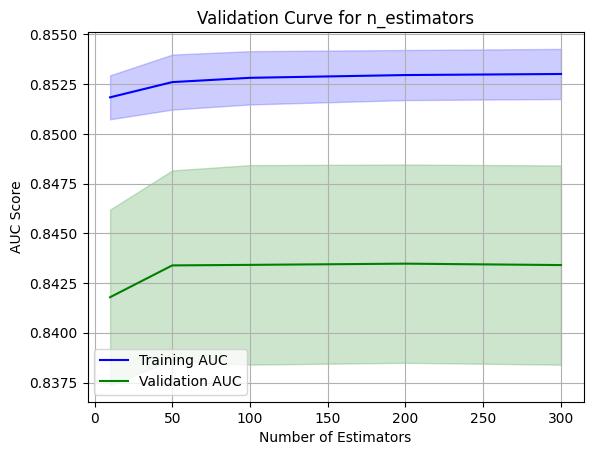

In [125]:
#range of estimators to test
param_range = [10, 50, 100, 200, 300]

# Use best hyperparams
model = RandomForestClassifier(
    max_depth=grid_search.best_params_['max_depth'],
    min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
    criterion=grid_search.best_params_['criterion'],
    random_state=1234
)

#validation curve
train_scores, test_scores = validation_curve(
    model, X_train, y_train,
    param_name='n_estimators',
    param_range=param_range,
    cv=5,
    scoring='roc_auc'
)

#computing mean and standard deviation
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, label='Training AUC', color='blue')
plt.plot(param_range, test_mean, label='Validation AUC', color='green')
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, alpha=0.2, color='blue')
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, alpha=0.2, color='green')
plt.xlabel('Number of Estimators')
plt.ylabel('AUC Score')
plt.title('Validation Curve for n_estimators')
plt.legend()
plt.grid(True)
plt.show()


Plot displays good generalization with overfitting not being an issue as the two values are similar in range

Begin Random Forest Implementation...
End
Plotting ROC Curve...


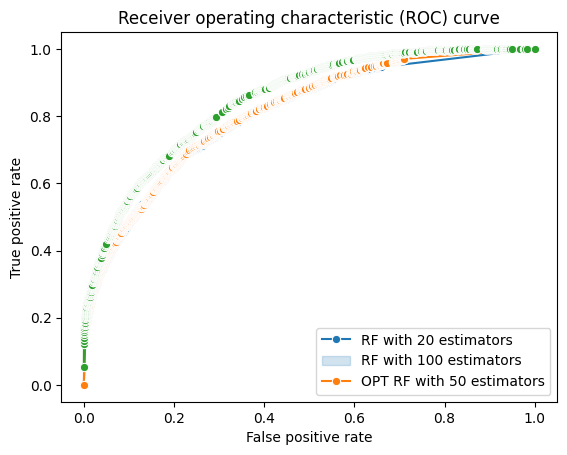

In [126]:
print('Begin Random Forest Implementation...')
rf_opt_model = RandomForestClassifier(criterion='gini', max_depth = 8, min_samples_leaf = 25, n_estimators=50)
rf_opt_model.fit(X_train, y_train) #using 50 estimators from when it plateaus 

 
rf_opt_preds = rf_opt_model.predict_proba(X_test)
rf_opt_predictions = list(rf_opt_preds[:, -1])
rf_opt_labels = rf_opt_model.predict(X_test)

#accuracy of optimal random forest 
acc_opt = accuracy_score(y_test, rf_opt_labels)
print('End')

fpr_opt, tpr_opt, thresholds_opt = roc_curve(y_test, rf_opt_predictions)

print('Plotting ROC Curve...')

fig = plt.figure()
ax = fig.add_subplot(111)


sns.lineplot(x=fpr_20, y=tpr_20, marker = 'o')
sns.lineplot(x=fpr_100, y=tpr_100, marker = 'o')
sns.lineplot(x=fpr_opt, y=tpr_opt, marker = 'o')

plt.title("Receiver operating characteristic (ROC) curve")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.legend(['RF with 20 estimators', 'RF with 100 estimators', 'OPT RF with 50 estimators'])
plt.show()


In [127]:
# AUC for rf_20_model
auc_20 = auc(fpr_20, tpr_20)
print("AUC of the RF model with 20 estimators is {:.3f}".format(auc_20))
print(f"Accuracy of RF model with 20 estimators: {acc_20:.3f}\n")

# AUC for rf_100_model
auc_100 = auc(fpr_100, tpr_100)
print("AUC of the RF model with 100 estimators is {:.3f}".format(auc_100))
print(f"Accuracy of RF model with 100 estimators: {acc_100:.3f}\n")

#AUC for rf_opt_model
auc_opt = auc(fpr_opt, tpr_opt)
print("AUC of the Optimal RF model with 50 estimators is {:.3f}".format(auc_opt))
print(f"Accuracy of RF model with 50 estimators: {acc_opt:.3f}\n")



AUC of the RF model with 20 estimators is 0.805
Accuracy of RF model with 20 estimators: 0.803

AUC of the RF model with 100 estimators is 0.811
Accuracy of RF model with 100 estimators: 0.806

AUC of the Optimal RF model with 50 estimators is 0.847
Accuracy of RF model with 50 estimators: 0.823



## Logistic Regression Model

In [128]:
X = df.drop(columns = 'income_binary')
y = df['income_binary']

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1234)

In [150]:
# scale data for feature balance, convergence, and scalability 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

C_values = [0.01, 0.1, 1, 10, 100]
accuracy_scores = []

for c in C_values:
    model = LogisticRegression(C=c, max_iter=1000)
    
    # Train the model and compute metrics
    model.fit(X_train_scaled, y_train)
    probability_predictions = model.predict_proba(X_test_scaled)
    l_loss = log_loss(y_test, probability_predictions)
    class_label_predictions = model.predict(X_test_scaled)
    acc_score = accuracy_score(y_test, class_label_predictions)

    accuracy_scores.append(acc_score)
    
    print(f"C={c}: Log Loss = {l_loss:.3f}, Accuracy = {acc_score:.3f}")


C=0.01: Log Loss = 0.319, Accuracy = 0.852
C=0.1: Log Loss = 0.318, Accuracy = 0.851
C=1: Log Loss = 0.318, Accuracy = 0.851
C=10: Log Loss = 0.318, Accuracy = 0.851
C=100: Log Loss = 0.318, Accuracy = 0.851


In [149]:
print("\nAll Accuracy Scores:", accuracy_scores)


All Accuracy Scores: [0.8517385540940144, 0.8507188742734781, 0.8507188742734781, 0.8506169062914245, 0.8506169062914245]


### Analysis

I began by training Random Forest models with 20 and 100 estimators to evaluate performance. The model with 20 estimators produced an AUC of 0.805 and an accuracy of 0.803, while increasing to 100 estimators led to a slight improvement with an AUC of 0.811 and accuracy of 0.806. To further optimize the model, I applied GridSearchCV to tune hyperparameters such as max_depth, min_samples_leaf, and criterion. Using the best settings, the refined Random Forest model with 50 estimators achieved a significant boost, reaching an AUC of 0.847 and an accuracy of 0.823.

To ensure the model's stability and guard against overfitting, I plotted a validation curve for n_estimators. The curve revealed that the AUC plateaued around 50 estimators, with a training AUC of approximately 0.852 and a closely aligned validation AUC of 0.842. This small gap suggested that the model was generalizing well and not overfitting.

I developed a logistic regression model using the same dataset where I applied one-hot encoding to categorical features and winsorization to the initial four numerical features. This time, I included all  features and experimented with a range of regularization strengths by varying the C parameter. The model achieved its highest accuracy of 0.851 when C = 0.01, outperforming our previously optimized random forest model, which had an accuracy of 0.823. Additionally, the logistic regression model produced a log loss of approximately 0.318, indicating solid predictive performance. By scaling the data, the model's accuracy and log loss remained consistent across all tested values of C, suggesting a stable and well-balanced feature set. This consistency also implies that the model is not overly sensitive to the regularization parameter, and that it generalizes well to new data. In this analysis, logistic regression demonstrated stronger predictive performance than the random forest model.